In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # визуализация
import seaborn as sns
from sklearn.preprocessing import StandardScaler   # стандартизация
from sklearn.cluster import KMeans   #кластеризация
from sklearn.metrics import silhouette_samples, silhouette_score   #силуэт
from sklearn.preprocessing import OneHotEncoder   # унитарный кодировщик
from yellowbrick.cluster import SilhouetteVisualizer

## Вариант – кластеризация синтетических данных

In [ ]:
df = pd.read_csv('/content/Compound.csv', sep='\t')
df.head()

x1     x2  class
0  26.75  22.15      1
1  29.80  22.15      1
2  31.55  21.10      1
3  27.70  20.85      1
4  29.90  19.95      1

### Кластерный анализ для 6 кластеров

In [ ]:
# стандартизация
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('class', axis=1))

# обучение модели и разбиение на кластеры
kmeans_6 = KMeans(n_clusters = 6).fit(X)
df['cluster6'] = kmeans_6.predict(X)

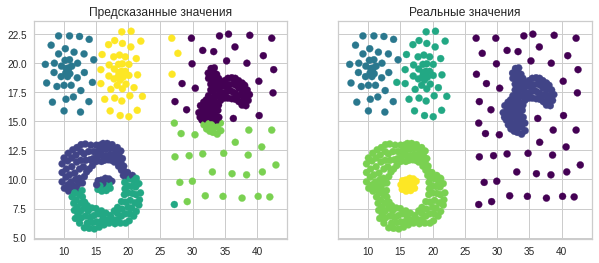

In [ ]:
# построение диаграмм кластеров
# сравнение истинного разбиения на классы с предсказанным

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax1.set_title('Предсказанные значения')
ax1.scatter(df.x1, df.x2, c=df['cluster6'], cmap='viridis')
ax2.set_title('Реальные значения')
ax2.scatter(df.x1, df.x2, c=df['class'], cmap='viridis')

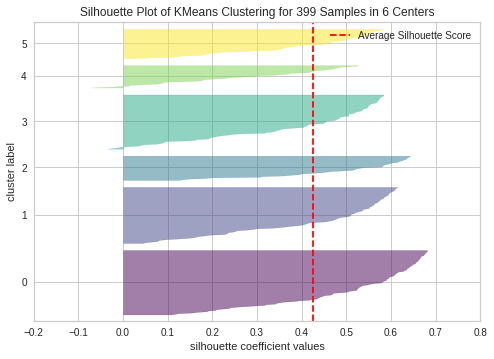

In [ ]:
# визуализация силуэтов по кластерам
visualizer = SilhouetteVisualizer(kmeans_6, colors='viridis')
visualizer.fit(X)
visualizer.show()

In [ ]:
# расчёт индекса силуэта
s_sc = silhouette_score(X, kmeans_6.labels_)
print('Значение силуэта для 6 кластеров: {:.2f}'.format(s_sc))

Значение силуэта для 6 кластеров: 0.43


Оценка силуэта ниже среднего, что говорит о низком качестве кластеризации. 

По толщине силуэтов можно сделать вывод о размерах кластеров. Так, 0, 1 и 3 примерно одинаковы по числу наблюдений. То же самое можно сказать и об остальных кластерах, чьи объёмы меньше, но почти равнозначны.

### Оптимизация числа кластеров

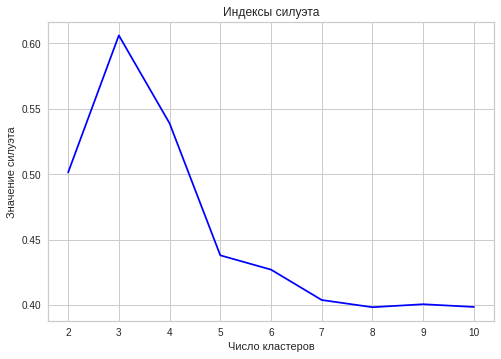

In [ ]:
# оптимизация по индексам силуэта
# перебор значений числа кластеров от 2 до 10
models = [KMeans(n_clusters = k).fit(X) for k in range(2, 11)]

# создание списка значений индекса силуэта
s_sc = [float(silhouette_score(X, model.labels_)) for model in models]

# визуализация значения индекса силуэта
plt.plot(range(2, 11), s_sc, color='blue')
plt.xlabel("Число кластеров")
plt.ylabel("Значение силуэта")
plt.title("Индексы силуэта")
plt.show()

При максимизации индекса силуэта наилучшим является разбиение на 3 кластера.

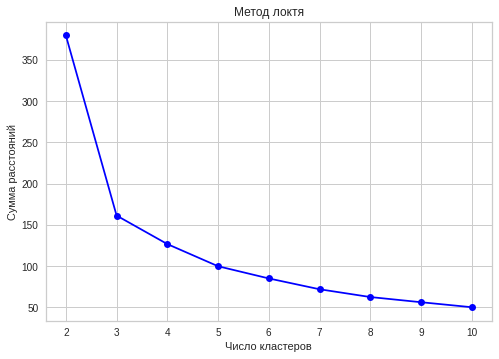

In [ ]:
# оптимизация по методу локтя
# значения критерия качества
dist=[i.inertia_ for i in models]

#Строим график
plt.plot(range(2, 11), dist, color='blue', marker="o")
plt.xlabel("Число кластеров")
plt.ylabel("Сумма расстояний")
plt.title("Метод локтя")
plt.show()

Наиболее резкий перегиб встречается при 3 кластерах => оптимально проводить разбиение на 3 кластера.

Так как оба метода дали одинаковые результаты, то для исходного набора данных будет проведена кластеризация для 3 кластеров.

### Кластерный анализ для 3 кластеров

In [ ]:
kmeans_3 = KMeans(n_clusters = 3).fit(X)   # обучение модели
df['cluster3'] = kmeans_3.predict(X)   # разбиение на кластеры

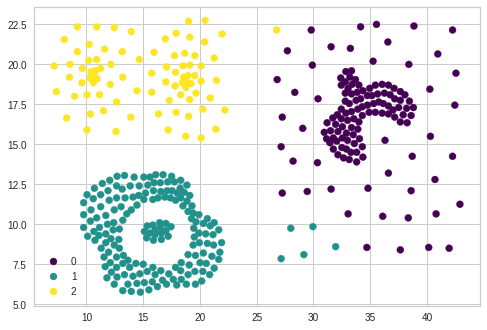

In [ ]:
scatter = plt.scatter(df.x1, df.x2, c=kmeans_3.labels_, cmap='viridis')   # диаграмма кластеров
plt.legend(handles=scatter.legend_elements()[0], labels=set(df['cluster3']))

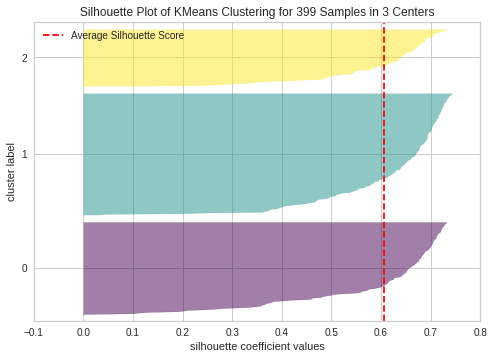

In [ ]:
# визуализация силуэтов по кластерам
visualizer = SilhouetteVisualizer(kmeans_3, colors='viridis').fit(X)
visualizer.show()

In [ ]:
# расчёт индекса силуэта
s_sc = silhouette_score(X, kmeans_3.labels_)
print('Значение силуэта для 3 кластеров: {:.2f}'.format(s_sc))

Значение силуэта для 3 кластеров: 0.61


Значение индекса силуэта значительно выше, чем у предыдущей модели (0.61 > 0.42).
Следовательно, разбиение исходного набора данных оптимально при 3 кластерах. По диаграмме силуэтов можно заметить, что наибольшим по числу наблюдений оказался 0 кластер, а наименьшим 3 кластер.

## Вариант – кластеризация банков

In [ ]:
banks = pd.read_excel('/content/banksRF.xlsx')
banks.head()

№              Банк      Город  Активы  Собственный капитал  \
0  1        «Авангард»     Москва  122109                20440   
1  2           «Аверс»     Казань  110741                24410   
2  3           «Агора»     Москва    1114                  356   
3  4  «Агропромкредит»  Лыткарино   18774                 2332   
4  5         «Агророс»    Саратов    7917                 1157   

   Средства физлиц  Кредиты НБС-нетто  Кредиты физлицам  
0            35443              32728              3319  
1            34918              13613              4924  
2              274                351               206  
3            12047               6484               903  
4             3564               1909               492

In [ ]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   №                    363 non-null    int64 
 1   Банк                 363 non-null    object
 2   Город                363 non-null    object
 3   Активы               363 non-null    int64 
 4   Собственный капитал  363 non-null    int64 
 5   Средства физлиц      363 non-null    int64 
 6   Кредиты НБС-нетто    363 non-null    int64 
 7   Кредиты физлицам     363 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.8+ KB


In [ ]:
# число уникальных банков
print(banks.shape[0] == len(banks.Банк.unique()))

True


Для кластеризации оставляем только количественные признаки.

In [ ]:
# исключение лишних признаков
df_banks = banks.drop(columns = ['№', 'Банк', 'Город'])
df_banks

Активы  Собственный капитал  Средства физлиц  Кредиты НБС-нетто  \
0     122109                20440            35443              32728   
1     110741                24410            34918              13613   
2       1114                  356              274                351   
3      18774                 2332            12047               6484   
4       7917                 1157             3564               1909   
..       ...                  ...              ...                ...   
358     7117                 4164                0                 43   
359    12504                 1431             7407               6637   
360     5024                 2117                0               2585   
361  1315550               197369           267400             665780   
362     2820                  362             1307               1732   

     Кредиты физлицам  
0                3319  
1                4924  
2                 206  
3                 903  
4                 492  
..                ...  
358                 0  
359              2238  
360               235  
361            170748  
362               221  

[363 rows x 5 columns]

In [ ]:
# стандартизация
X = StandardScaler().fit_transform(df_banks)

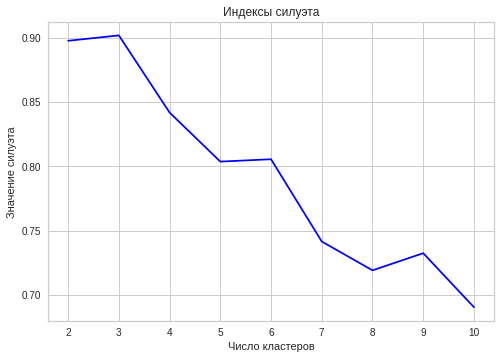

In [ ]:
# оптимизация по индексам силуэтам
# перебор значений числа кластеров от 2 до 10
models = [KMeans(n_clusters = k).fit(X) for k in range(2, 11)]

# создание списка значений индекса силуэта
s_sc = [float(silhouette_score(X, model.labels_)) for model in models]

# визуализация значения индекса силуэта
plt.plot(range(2, 11), s_sc, color='blue')
plt.xlabel("Число кластеров")
plt.ylabel("Значение силуэта")
plt.title("Индексы силуэта")
plt.show()

Наибольший индекс силуэта при 3 кластерах.

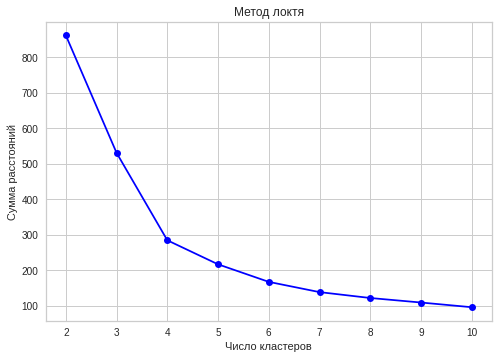

In [ ]:
# оптимизация по методу локтя
# значения критерия качества
dist = [i.inertia_ for i in models]

#Строим график
plt.plot(range(2, 11), dist, color='blue', marker="o")
plt.xlabel("Число кластеров")
plt.ylabel("Сумма расстояний")
plt.title("Метод локтя")
plt.show()

По методу локтя оптимально разбить либо на 3, либо на 4 кластера.

In [ ]:
# модель на 3 кластера
kmeans = KMeans(n_clusters = 3).fit(X)   # обучение модели
banks['cluster'] = kmeans.predict(X)   # разбиение на кластеры

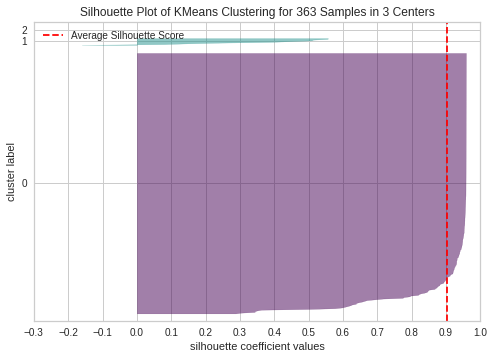

In [ ]:
# визуализация силуэтов по кластерам
visualizer = SilhouetteVisualizer(kmeans, colors='viridis').fit(X)
visualizer.show()

In [ ]:
# модель на 4 кластера
kmeans = KMeans(n_clusters = 4).fit(X)   # обучение модели
banks['cluster'] = kmeans.predict(X)   # разбиение на кластеры

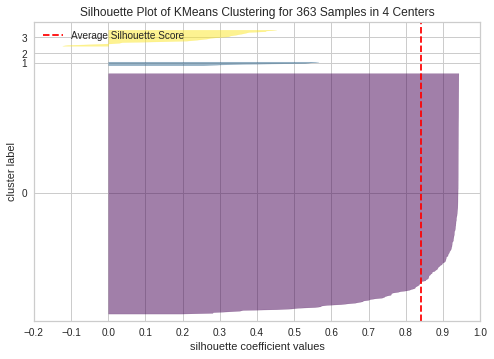

In [ ]:
# визуализация силуэтов по кластерам
visualizer = SilhouetteVisualizer(kmeans, colors='viridis').fit(X)
visualizer.show()

Нулевой кластер оказался наибольшим. Остальные кластеры совсем невелики.